In [1]:
#Load the required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf

In [2]:
# Load the dataset
df = pd.read_csv('NB_data.csv')

In [3]:
# Separate features (X) and target variable (y)
X = df['Combined_Text']
y = df['Sentiment']

In [4]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [5]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [6]:
# Convert numpy arrays to pandas Series
y_train = pd.Series(y_train, name='Label')
y_test = pd.Series(y_test, name='Label')

In [7]:
#X_train.to_csv('NN_Train_set.csv', index=False)
#X_test.to_csv('NN_Test_set.csv', index=False)
#y_train.to_csv('NN_Train_label.csv', index=False)
#y_test.to_csv('NN_Test_label.csv', index=False)

In [8]:
# Vectorize the text data using TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [9]:
# Build the neural network model
model = Sequential()
model.add(Dense(128, input_shape=(X_train_tfidf.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(X_train_tfidf, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.3704 - loss: 1.0842 - val_accuracy: 0.8500 - val_loss: 1.0024
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6563 - loss: 0.9952 - val_accuracy: 0.8500 - val_loss: 0.9212
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8573 - loss: 0.9010 - val_accuracy: 1.0000 - val_loss: 0.8271
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8825 - loss: 0.8222 - val_accuracy: 1.0000 - val_loss: 0.7246
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8809 - loss: 0.7259 - val_accuracy: 1.0000 - val_loss: 0.6106


In [12]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test_tfidf, y_test, verbose=0)
print("Test Accuracy:", accuracy)

Test Accuracy: 1.0


In [13]:
# Make predictions on the testing set
y_pred_prob = model.predict(X_test_tfidf)
y_pred = np.argmax(y_pred_prob, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step 


In [14]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

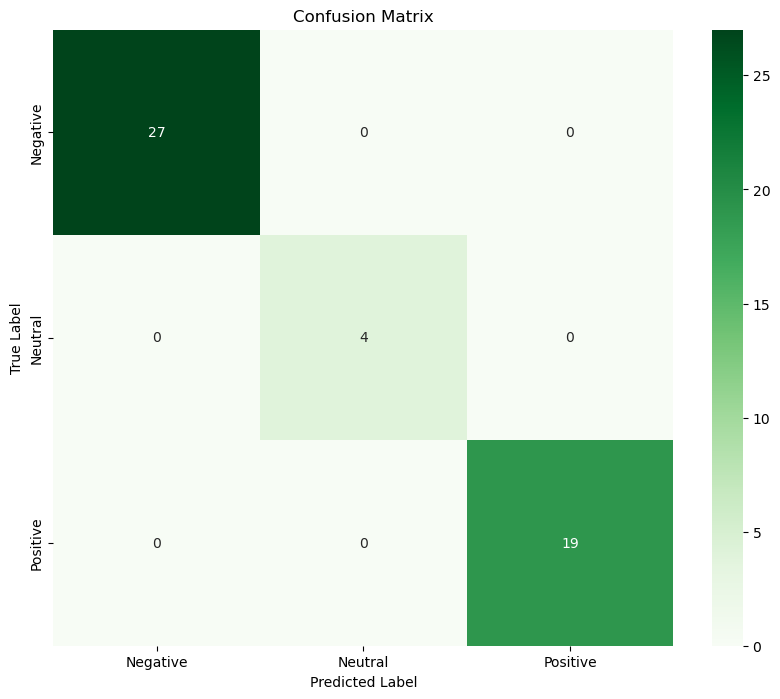

In [30]:
# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [16]:
# Perform sentiment analysis
sentiments = []
for text in X:
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        sentiments.append('Positive')
    elif sentiment_score == 0:
        sentiments.append('Neutral')
    else:
        sentiments.append('Negative')

In [17]:
# Add sentiment column to the dataframe
df['Sentiment'] = sentiments

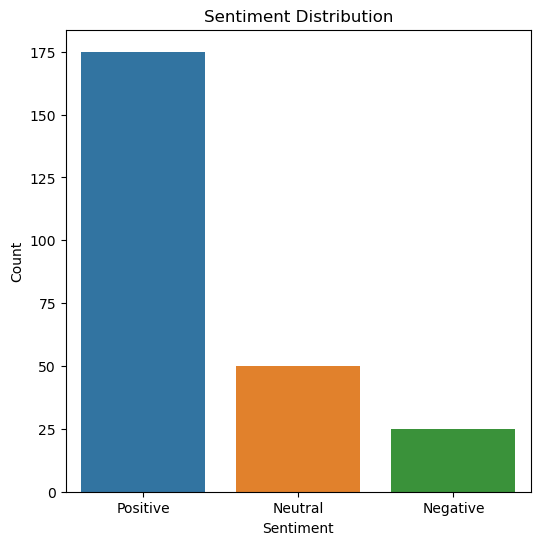

In [18]:
# Visualize sentiment distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [19]:
# Perform topic modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_vec = vectorizer.fit_transform(X)

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_output = lda_model.fit_transform(X_vec)

In [20]:
# Print the top words for each topic
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic {topic_idx+1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
    print()

Topic 1:
new green transformation fight deal victory president biden years saying

Topic 2:
climate house tiktok activist white action industry manufacturing scientist defaming

Topic 3:
climate eco kerrys oversight maryland whale john energy groups coordination

Topic 4:
federal fox bidens gas natural kerrys staff john biden latest

Topic 5:
senate john gas silent confirmation biden news digital fox energy



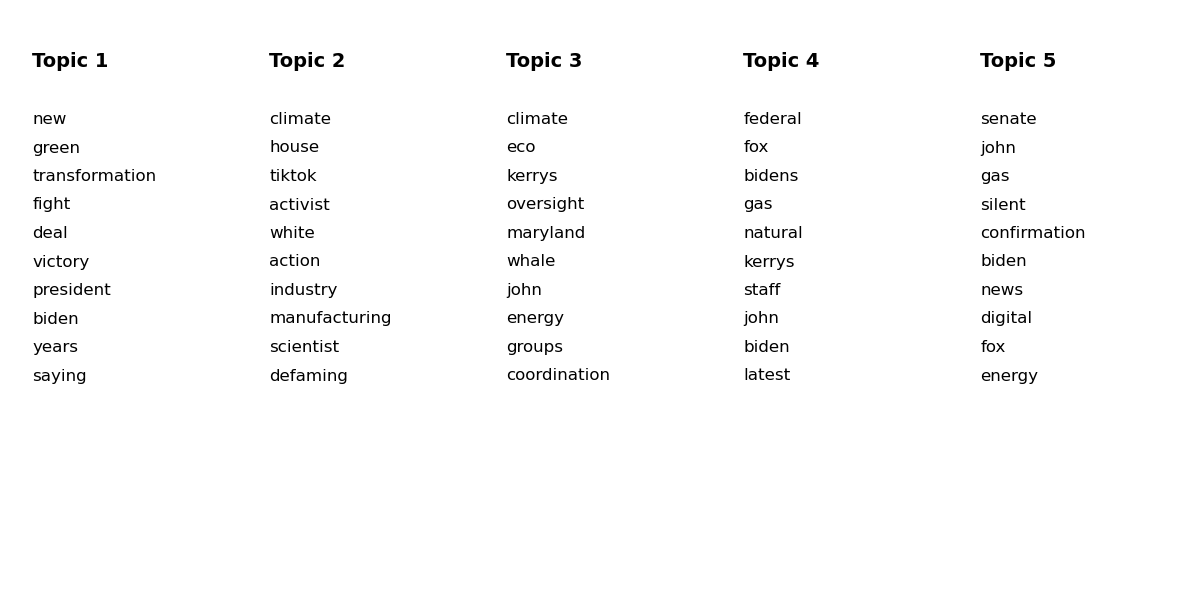

In [31]:
# Define the number of topics and number of columns for subplots
num_topics = len(lda_model.components_)
num_cols = 5
num_rows = (num_topics + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Iterate over topics and plot top words
for i, topic in enumerate(lda_model.components_):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]
    
    # Plot topic number
    ax.text(0.1, 0.9, f"Topic {i + 1}", fontsize=14, fontweight='bold')
    ax.axis('off')
    
    # Get top words for the current topic
    top_word_indices = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[idx] for idx in top_word_indices]
    
    # Plot top words
    for j, word in enumerate(top_words):
        ax.text(0.1, 0.8 - j * 0.05, word, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

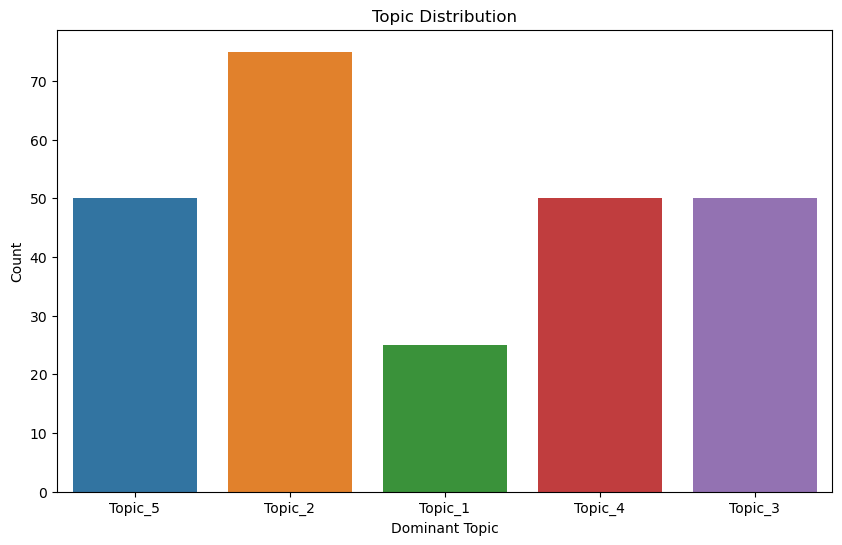

In [21]:
# Visualize topic distribution
topic_distribution = pd.DataFrame(lda_output, columns=[f"Topic_{i+1}" for i in range(lda_output.shape[1])])
topic_distribution['Dominant_Topic'] = topic_distribution.idxmax(axis=1)
plt.figure(figsize=(10, 6))
sns.countplot(x='Dominant_Topic', data=topic_distribution)
plt.title('Topic Distribution')
plt.xlabel('Dominant Topic')
plt.ylabel('Count')
plt.show()

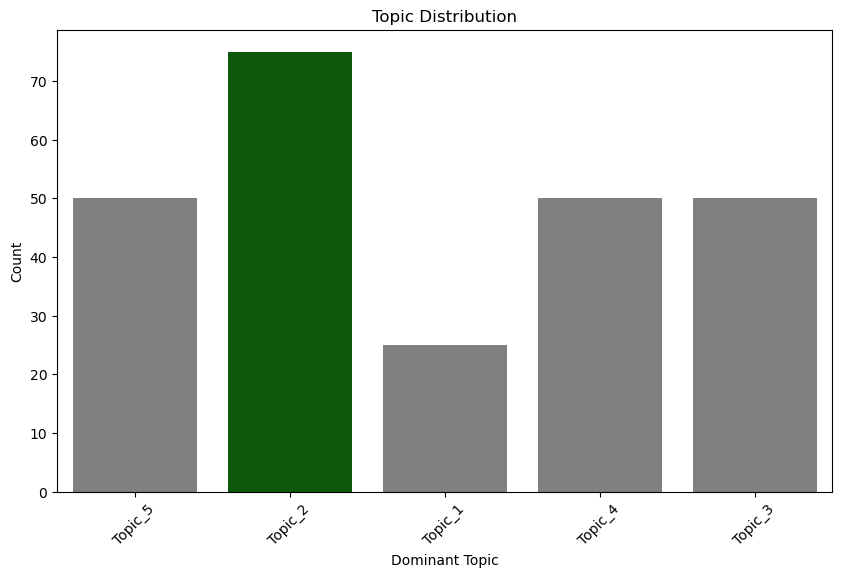

In [28]:
# Get the counts of dominant topics
topic_counts = topic_distribution['Dominant_Topic'].value_counts().reset_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))

# Assign colors
colors = ['darkgreen' if topic == topic_counts.iloc[1]['Dominant_Topic'] else 'grey' for topic in topic_counts['Dominant_Topic']]

sns.countplot(x='Dominant_Topic', data=topic_distribution, palette=colors)
plt.title('Topic Distribution')
plt.xlabel('Dominant Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()